# Test the histogram lib

In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from coffea.util import load
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep

from pprint import pprint 
hep.style.use(hep.style.ROOT)

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [15]:
import hist
import numpy as np
import sys
sys.path.append("../")

In [ ]:
histo = (
    hist.Hist.new
    .StrCat([], name="year", growth=True)
    .Reg(20, -10, 10, name="x", label="x value")
    .Reg(20, -10, 10, name="y", label="y value")
    .Reg(20, -10, 10, name="z", label="z value")
    .Weight(name="Counts")
).fill("a",  np.random.normal(1.5, 0.7, 10_000),  np.random.normal(1.5, 0.7, 10_000),  np.random.normal(1.5, 0.7, 10_000))

In [8]:
histo2 = (
    hist.Hist.new
    .StrCat([], name="year", growth=True)
    .Reg(20, -10, 10, name="x", label="x value")
    .Reg(20, -10, 10, name="y", label="y value")
    .Reg(20, -10, 10, name="z", label="z value")
    .Weight(name="Counts")
).fill("b",  np.random.normal(1.5, 0.7, 10_000),  np.random.normal(1.5, 0.7, 10_000),  np.random.normal(1.5, 0.7, 10_000))

In [31]:
histo['a',1j:10j,:,sum]

Hist(
  Regular(9, 1, 10, name='x', label='x value'),
  Regular(20, -10, 10, name='y', label='y value'),
  storage=Weight()) # Sum: WeightedSum(value=7619, variance=7619) (WeightedSum(value=10000, variance=10000) with flow)

In [37]:
H = histo[{"x": slice(-5j,5j,sum)}]

In [40]:
H["a",:,:]

Hist(
  Regular(20, -10, 10, name='y', label='y value'),
  Regular(20, -10, 10, name='z', label='z value'),
  storage=Weight()) # Sum: WeightedSum(value=10000, variance=10000)

In [20]:
H1 = hist.Hist(hist.axis.StrCategory(["a","b","c"], name="var"))
H2 = hist.Hist(hist.axis.StrCategory(["b","a","c"], name="var"))

In [21]:
H1 + H2

ValueError: axes not mergable

In [2]:
import importlib
from pprint import pprint

# Testing Histogram configuration

In [1]:
import sys
sys.path.append("../")
from importlib import reload

In [2]:
from PocketCoffea.lib import HistManager
from PocketCoffea.lib.HistManager import Axis, HistConf
from PocketCoffea.parameters import histograms

In [3]:
reload(histograms)

<module 'PocketCoffea.parameters.histograms' from '/work/dvalsecc/ttHbb/PocketCoffea/notebooks/../PocketCoffea/parameters/histograms.py'>

In [4]:
hs = histograms.default_hists_jet("jet", coll="JetGood")
hs["jet_eta"].only_categories=["B","A"]
hs["jet_eta"].only_variations=["pileup"]
year_ax = Axis(type="strcat", field="year", bins=["2018"], start=None, label="Year")

In [5]:
hs

{'jet_eta': HistConf(axes=[Axis(field='eta', label='$\\eta_{j}$', bins=80, start=-4, stop=4, coll='JetGood', pos=None, type='regular', transform=None, lim=(-4, 4), underflow=True, overflow=True, growth=False)], storage='weight', autofill=True, variations=True, only_variations=['pileup'], exclude_samples=None, only_samples=None, exclude_categories=None, only_categories=['B', 'A']),
 'jet_pt': HistConf(axes=[Axis(field='pt', label='$p_{T}^{j}$ [GeV]', bins=150, start=0, stop=1500, coll='JetGood', pos=None, type='regular', transform=None, lim=(0, 500), underflow=True, overflow=True, growth=False)], storage='weight', autofill=True, variations=True, only_variations=None, exclude_samples=None, only_samples=None, exclude_categories=None, only_categories=None),
 'jet_phi': HistConf(axes=[Axis(field='phi', label='$\\phi_{j}$', bins=128, start=-3.141592653589793, stop=3.141592653589793, coll='JetGood', pos=None, type='regular', transform=None, lim=(-3.141592653589793, 3.141592653589793), underfl

In [6]:
hm = HistManager.HistManager(hs, sample="ttHtoBB", categories_config={"A":[],"B":[],"C":[]}, variations_config={"weights":{"A":["btag","pileup"],"B":[], "C":[]}}, custom_axes=[year_ax])

In [7]:
hm.histograms

{'jet_eta': HistConf(axes=[Axis(field='year', label='Year', bins=['2018'], start=None, stop=None, coll='events', pos=None, type='strcat', transform=None, lim=(0, 0), underflow=True, overflow=True, growth=False), Axis(field='eta', label='$\\eta_{j}$', bins=80, start=-4, stop=4, coll='JetGood', pos=None, type='regular', transform=None, lim=(-4, 4), underflow=True, overflow=True, growth=False)], storage='weight', autofill=True, variations=True, only_variations=['nominal', 'pileupUp', 'pileupDown'], exclude_samples=None, only_samples=None, exclude_categories=None, only_categories=['B', 'A']),
 'jet_pt': HistConf(axes=[Axis(field='year', label='Year', bins=['2018'], start=None, stop=None, coll='events', pos=None, type='strcat', transform=None, lim=(0, 0), underflow=True, overflow=True, growth=False), Axis(field='pt', label='$p_{T}^{j}$ [GeV]', bins=150, start=0, stop=1500, coll='JetGood', pos=None, type='regular', transform=None, lim=(0, 500), underflow=True, overflow=True, growth=False)], 

In [8]:
hm._hist_objs

{'jet_eta': Hist(
   StrCategory(['A', 'B'], label='cat'),
   StrCategory(['nominal', 'pileupUp', 'pileupDown'], label='variation'),
   StrCategory(['2018'], name='year', label='Year'),
   Regular(80, -4, 4, name='eta', label='$\\eta_{j}$'),
   storage=Weight()) # Sum: WeightedSum(value=0, variance=0),
 'jet_pt': Hist(
   StrCategory(['A', 'B', 'C'], label='cat'),
   StrCategory(['nominal', 'btagUp', 'pileupUp', 'btagDown', 'pileupDown'], label='variation'),
   StrCategory(['2018'], name='year', label='Year'),
   Regular(150, 0, 1500, name='pt', label='$p_{T}^{j}$ [GeV]'),
   storage=Weight()) # Sum: WeightedSum(value=0, variance=0),
 'jet_phi': Hist(
   StrCategory(['A', 'B', 'C'], label='cat'),
   StrCategory(['nominal', 'btagUp', 'pileupUp', 'btagDown', 'pileupDown'], label='variation'),
   StrCategory(['2018'], name='year', label='Year'),
   Regular(128, -3.14159, 3.14159, name='phi', label='$\\phi_{j}$'),
   storage=Weight()) # Sum: WeightedSum(value=0, variance=0),
 'jet_btagDeep

In [13]:
hm.histograms["jet_eta"].serialize()

{'axes': [{'field': 'year',
   'label': 'Year',
   'bins': ['2018'],
   'start': None,
   'stop': None,
   'coll': 'events',
   'pos': None,
   'type': 'strcat',
   'transform': None,
   'lim': (0, 0),
   'underflow': True,
   'overflow': True,
   'growth': False},
  {'field': 'eta',
   'label': '$\\eta_{j}$',
   'bins': 80,
   'start': -4,
   'stop': 4,
   'coll': 'JetGood',
   'pos': None,
   'type': 'regular',
   'transform': None,
   'lim': (-4, 4),
   'underflow': True,
   'overflow': True,
   'growth': False}],
 'storage': 'weight',
 'autofill': True,
 'variations': True,
 'only_variations': ['nominal', 'pileupUp', 'pileupDown'],
 'exclude_samples': None,
 'only_samples': None,
 'exclude_categories': None,
 'only_categories': ['B', 'A']}

# Check output

In [92]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from coffea.util import load
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep

from pprint import pprint 
hep.style.use(hep.style.ROOT)

In [93]:
out = load("../output/test_base_varbycat_v1/output.coffea")
out["variables"].keys()

dict_keys(['jet_eta', 'jet_pt', 'jet_phi', 'jet_btagDeepFlavB', 'ele_eta', 'ele_pt', 'ele_phi', 'ele_etaSC', 'muon_eta', 'muon_pt', 'muon_phi', 'nJets', 'nBJets', 'jet_eta_1', 'jet_pt_1', 'jet_phi_1', 'jet_btagDeepFlavB_1', 'jet_eta_2', 'jet_pt_2', 'jet_phi_2', 'jet_btagDeepFlavB_2', 'jet_eta_3', 'jet_pt_3', 'jet_phi_3', 'jet_btagDeepFlavB_3', 'jet_eta_4', 'jet_pt_4', 'jet_phi_4', 'jet_btagDeepFlavB_4', 'jet_eta_5', 'jet_pt_5', 'jet_phi_5', 'jet_btagDeepFlavB_5', 'bjet_eta_1', 'bjet_pt_1', 'bjet_phi_1', 'bjet_btagDeepFlavB_1', 'bjet_eta_2', 'bjet_pt_2', 'bjet_phi_2', 'bjet_btagDeepFlavB_2', 'bjet_eta_3', 'bjet_pt_3', 'bjet_phi_3', 'bjet_btagDeepFlavB_3', 'bjet_eta_4', 'bjet_pt_4', 'bjet_phi_4', 'bjet_btagDeepFlavB_4', 'bjet_eta_5', 'bjet_pt_5', 'bjet_phi_5', 'bjet_btagDeepFlavB_5', 'jet_eta_pt_leading', 'jet_eta_pt_all'])

In [70]:
out["processing_metadata"].keys()

dict_keys([])

In [73]:
out["sumw"]

{'no_btagSF': {'ttHTobb': 2405.591259149408,
  'TTToSemiLeptonic': 2889470.4618744687},
 'btagSF': {'ttHTobb': 2955.5970674980895,
  'TTToSemiLeptonic': 3300504.795095897}}

In [77]:
out["variables"]["nBJets"]

{'ttHTobb': Hist(
   StrCategory(['btagSF', 'no_btagSF'], name='cat', label='Category'),
   StrCategory(['nominal'], name='variation', label='Variation'),
   StrCategory(['2018'], name='year', label='year'),
   Regular(12, 2, 14, name='nBJetGood', label='$N_{BJetGood}$'),
   storage=Weight()) # Sum: WeightedSum(value=4683.99, variance=10.2288) (WeightedSum(value=5361.19, variance=12.0522) with flow),
 'TTToSemiLeptonic': Hist(
   StrCategory(['btagSF', 'no_btagSF'], name='cat', label='Category'),
   StrCategory(['nominal'], name='variation', label='Variation'),
   StrCategory(['2018'], name='year', label='year'),
   Regular(12, 2, 14, name='nBJetGood', label='$N_{BJetGood}$'),
   storage=Weight()) # Sum: WeightedSum(value=3.25102e+06, variance=158711) (WeightedSum(value=6.18998e+06, variance=318420) with flow)}

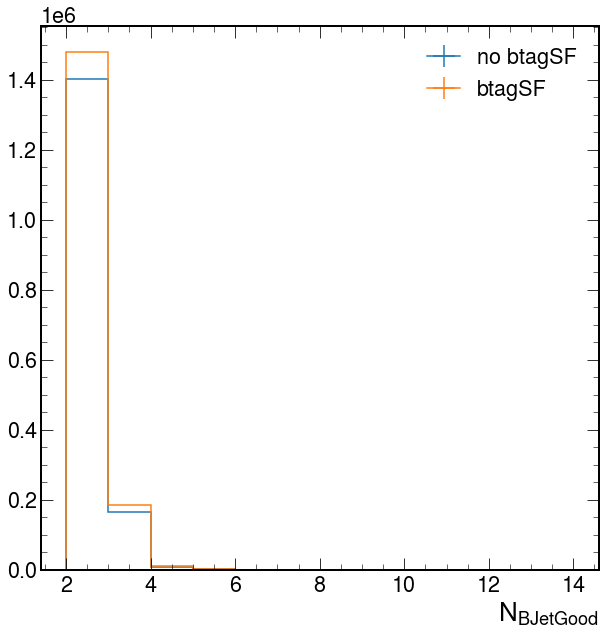

In [76]:
fig, ax = plt.subplots()

H = out["variables"]["nBJets"]["TTToSemiLeptonic"]
hep.histplot(H[{"cat":"no_btagSF","variation":"nominal", "year":"2018"}], label="no btagSF")
hep.histplot(H[{"cat":"btagSF","variation":"nominal", "year":"2018"}],label="btagSF")
plt.legend()

(0.0, 500.0)

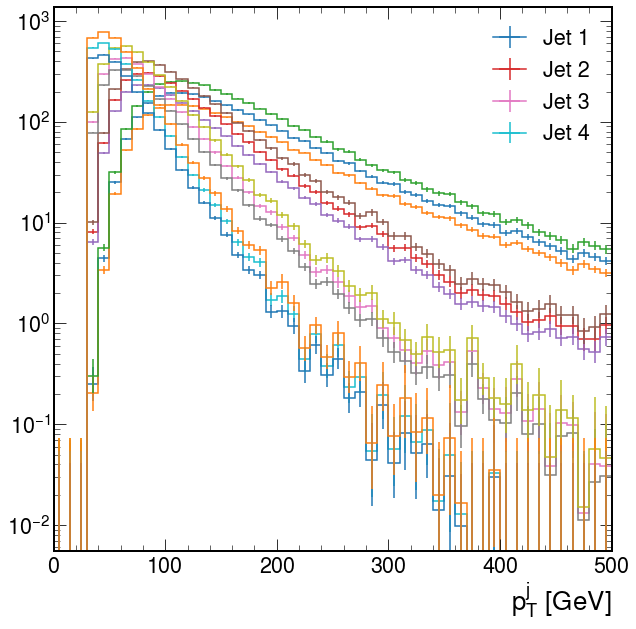

In [67]:
fig, ax = plt.subplots()

for i in range(1,5):
    H = out["variables"][f"jet_pt_{i}"]["ttHTobb"]
    hep.histplot(H[{"cat":"baseline","variation":"nominal", "year":"2018"}], label=f"Jet {i}")
    hep.histplot(H[{"cat":"baseline","variation":"sf_btag_lfUp", "year":"2018"}])
    hep.histplot(H[{"cat":"baseline","variation":"sf_btag_lfDown", "year":"2018"}])
plt.legend()
plt.yscale("log")
plt.xlim(0,500.)

In [59]:
H.axes["year"]

StrCategory(['2018', '2018'], name='year', label='year')

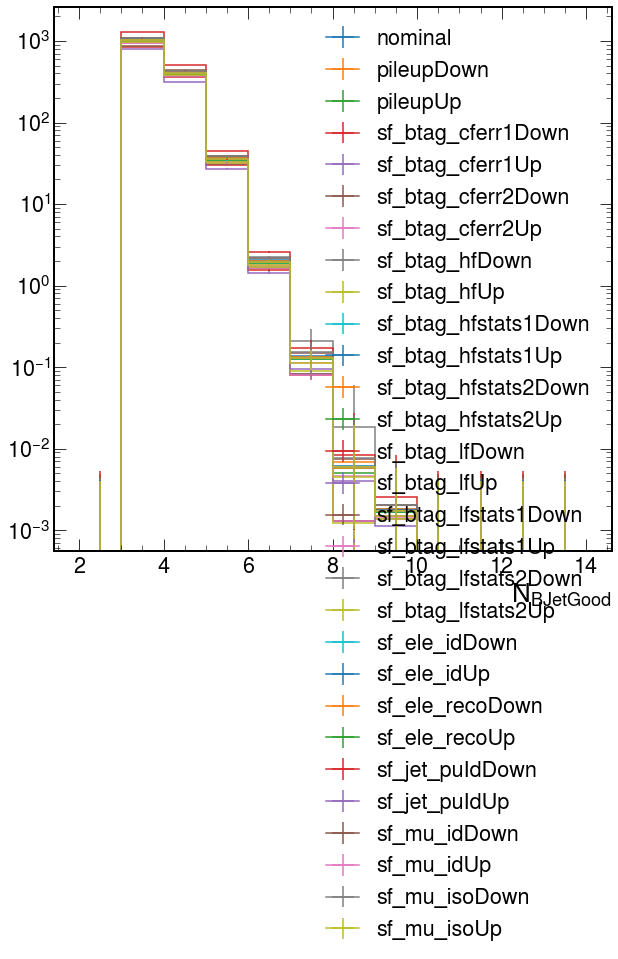

In [57]:
from PocketCoffea.parameters.btag import btag_variations
fig, ax = plt.subplots()

H = out["variables"]["nBJets"]["ttHTobb"]

for var in H.axes["variation"]:
    hep.histplot(H[{"cat":"3b","variation": var, "year":"2018"}],label=var)
plt.yscale("log")

plt.legend()

In [53]:
H = out["variables"]["jet_eta_1"]["TTToSemiLeptonic"]

In [54]:
H

Hist(
  StrCategory(['1b', '2b', '3b', '4b', 'baseline'], name='cat', label='Category'),
  StrCategory(['nominal', 'pileupDown', 'pileupUp', 'sf_btag_cferr1Down', 'sf_btag_cferr1Up', 'sf_btag_cferr2Down', 'sf_btag_cferr2Up', 'sf_btag_hfDown', 'sf_btag_hfUp', 'sf_btag_hfstats1Down', 'sf_btag_hfstats1Up', 'sf_btag_hfstats2Down', 'sf_btag_hfstats2Up', 'sf_btag_lfDown', 'sf_btag_lfUp', 'sf_btag_lfstats1Down', 'sf_btag_lfstats1Up', 'sf_btag_lfstats2Down', 'sf_btag_lfstats2Up', 'sf_ele_idDown', 'sf_ele_idUp', 'sf_ele_recoDown', 'sf_ele_recoUp', 'sf_jet_puIdDown', 'sf_jet_puIdUp', 'sf_mu_idDown', 'sf_mu_idUp', 'sf_mu_isoDown', 'sf_mu_isoUp'], name='variation', label='Variation'),
  StrCategory(['2018', '2018'], name='year', label='year'),
  Regular(100, -3, 3, name='eta', label='$\\eta_{j}$'),
  storage=Weight()) # Sum: WeightedSum(value=2.29915e+08, variance=1.23086e+07)

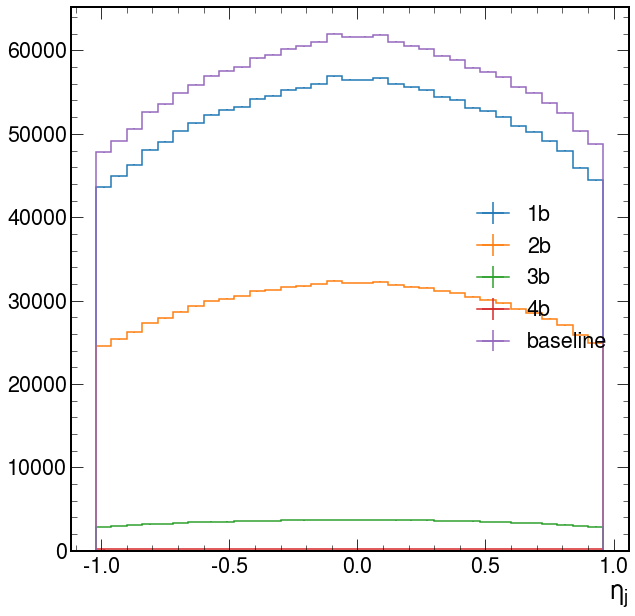

In [56]:
H = out["variables"]["jet_eta_1"]["TTToSemiLeptonic"]

for cat in H.axes["cat"]:
    hep.histplot(H[{"cat":cat, "variation":"nominal", "year":"2018", "eta":slice(-1j, 1j)}], label=cat)
    
plt.legend()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f98eda5d630>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f98eda5d9f0>, text=[])

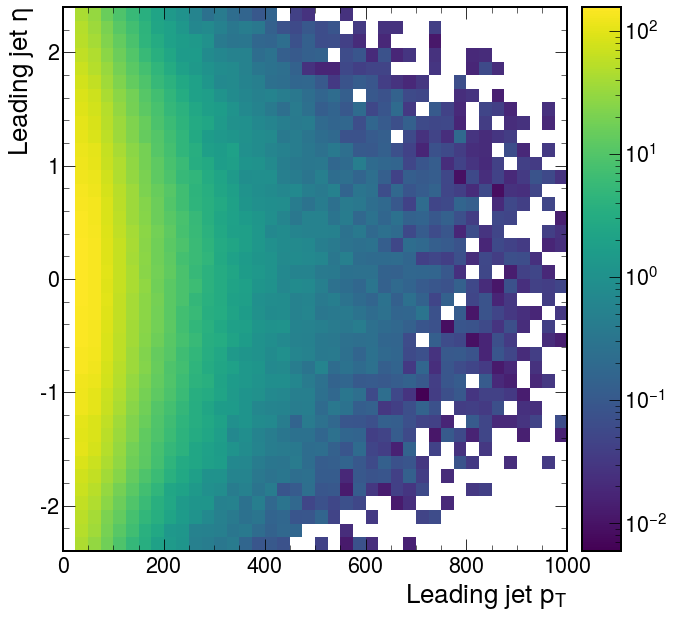

In [26]:
H = out["variables"]["jet_eta_pt_all"]["ttHTobb"]
hep.hist2dplot(H[{"cat":"baseline", "variation":"nominal", "year":"2018"}], norm=LogNorm())

(25.0, 50.0)

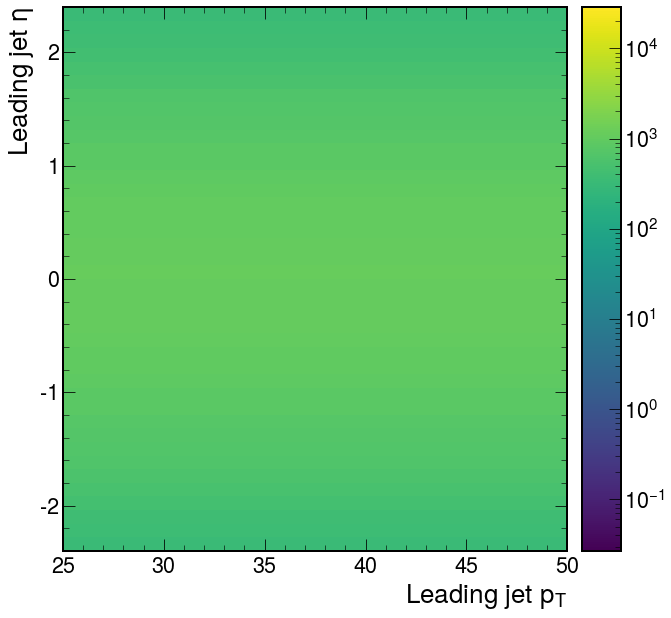

In [48]:
H = out["variables"]["jet_eta_pt_leading"]["TTToSemiLeptonic"]
hep.hist2dplot(H[{"cat":"baseline", "variation":"sf_jet_puIdUp", "year":"2018"}], norm=LogNorm())
plt.xlim(25., 50.)

In [10]:
out["processing_metadata"]["events_per_chunk"]['TTToSemiLeptonic']

Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  StrCategory(['2018'], name='year', label='year'),
  Regular(100, 0, 500000, name='nEvents_initial', label='Number of events in the chunk'),
  Regular(100, 0, 500000, name='nEvents_after_skim', label='Number of events after skim per chunk'),
  Regular(100, 0, 500000, name='nEvents_after_presel', label='Number of events after preselection per chunk'),
  storage=Int64()) # Sum: 6.0

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7d9d34e2c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7d9d34e590>, text=[])

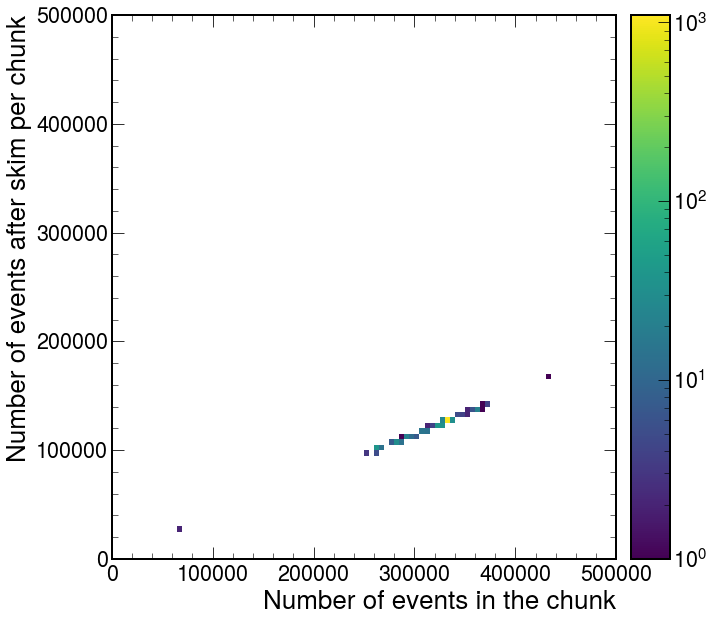

In [35]:
e = out["processing_metadata"]["events_per_chunk"]['ttHTobb']
hep.hist2dplot(out["processing_metadata"]["events_per_chunk"]['TTToSemiLeptonic'][0,0,0,:,:,sum], norm=LogNorm())
#hep.hist2dplot(out["processing_metadata"]["events_per_chunk"]['ttHTobb'][0,0,0,:,:,sum], norm=LogNorm())
#plt.xlim(0, 100000)
#plt.ylim(0, 100000)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7d9d8f6ad0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7d9d8f6da0>, text=[])

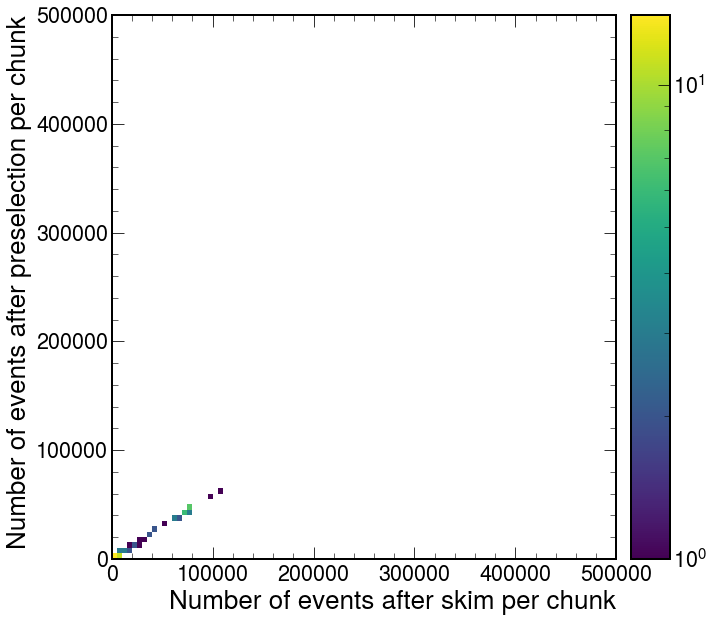

In [32]:
e = out["processing_metadata"]["events_per_chunk"]['TTToSemiLeptonic']
#hep.hist2dplot(out["processing_metadata"]["events_per_chunk"]['TTToSemiLeptonic'][0,0,0,:,:,sum], norm=LogNorm())
hep.hist2dplot(out["processing_metadata"]["events_per_chunk"]['ttHTobb'][0,0,0,sum,:,:], norm=LogNorm())
#plt.xlim(0, 100000)
#plt.ylim(0, 100000)

In [38]:
out["cutflow"]

{'initial': {'ttHTobb': 922000, 'TTToSemiLeptonic': 4400000},
 'skim': {'ttHTobb': 218516, 'TTToSemiLeptonic': 1679974},
 'presel': {'ttHTobb': 129555, 'TTToSemiLeptonic': 599562},
 'baseline': {'ttHTobb': 129555.0, 'TTToSemiLeptonic': 599562.0},
 '1b': {'ttHTobb': 128133.0, 'TTToSemiLeptonic': 555995.0},
 '2b': {'ttHTobb': 115195.0, 'TTToSemiLeptonic': 327411.0},
 '3b': {'ttHTobb': 74087.0, 'TTToSemiLeptonic': 35774.0},
 '4b': {'ttHTobb': 23600.0, 'TTToSemiLeptonic': 1890.0}}

In [26]:
e

Hist(
  StrCategory(['baseline'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  StrCategory(['2018'], name='year', label='year'),
  Regular(1000, 0, 400000, name='nEvents_after_skim', label='Number of events after skim per chunk'),
  Regular(1000, 0, 400000, name='nEvents_after_presel', label='Number of events after preselection per chunk'),
  storage=Int64()) # Sum: 1.0

In [107]:
H = out["variables"]['nJets']["ttHTobb"]

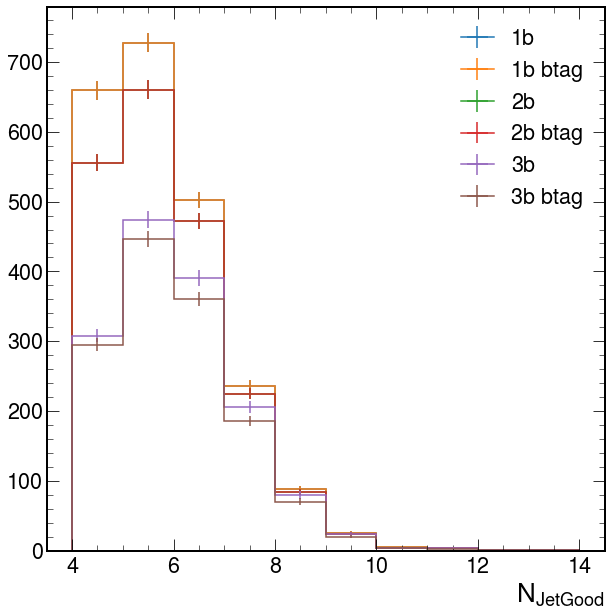

In [108]:
hep.histplot(H[{"cat":"1b", "variation":"nominal", "year":"2018"}], label="1b")
hep.histplot(H[{"cat":"1b", "variation":"sf_btag_lfstats1Up", "year":"2018"}], label="1b btag")
hep.histplot(H[{"cat":"2b", "variation":"nominal", "year":"2018"}], label="2b")
hep.histplot(H[{"cat":"2b", "variation":"sf_btag_lfstats1Up", "year":"2018"}], label="2b btag")
hep.histplot(H[{"cat":"3b", "variation":"nominal", "year":"2018"}], label="3b")
hep.histplot(H[{"cat":"3b", "variation":"sf_btag_lfstats1Up", "year":"2018"}], label="3b btag")
plt.legend()
    

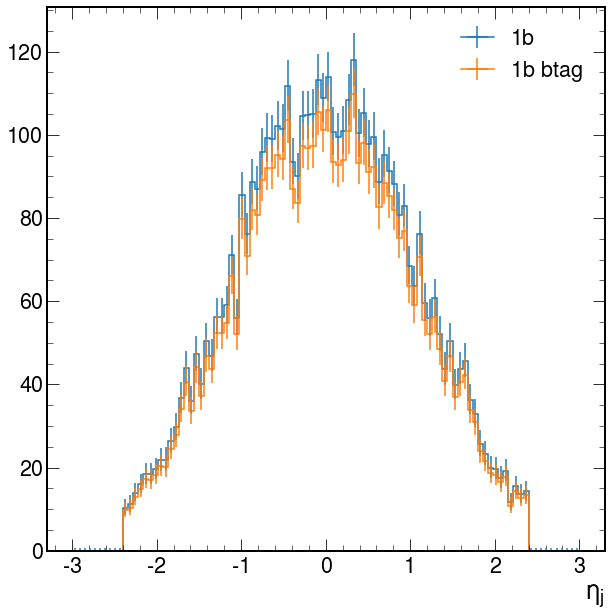

In [98]:
hep.histplot(H[{"cat":"3b", "variation":"nominal", "year":"2018"}], label="1b")
hep.histplot(H[{"cat":"3b", "variation":"sf_btag_lfstats1Up", "year":"2018"}], label="1b btag")
plt.legend()